In [102]:
import pandas as pd
from dataclasses import dataclass , field
from pathlib import Path



@dataclass
class DfData:
    folder_patch : str =field(repr=False)
    df_feature : pd.DataFrame = field(init=False)
    df_info : pd.DataFrame = field(init=False)
    
    def __post_init__(self):
        self.folder_patch = Path(self.folder_patch)
        
        patch_df = (self.folder_patch / "features.csv").absolute().as_posix()
        name_folder = self.folder_patch.name
        df=  pd.read_csv(patch_df)
        df["folder"] = name_folder
        
        self.df_feature =df.loc[:,df.columns[:-3]]
        self.df_info = df.loc[:,df.columns[-3:]]     
        




In [ ]:
# on définie tout les df a manipuler
@dataclass
class DfCollection :
    df_train : DfData
    df_val : DfData
    df_test : DfData
    df_image_temoins : DfData

    
df = DfData(folder_patch="1.DataSet/Image/data_timenote/train")
df_val = DfData(folder_patch="1.DataSet/Image/data_timenote/val")
df_test = DfData(folder_patch="1.DataSet/Image/data_timenote/test")
df_image_temoins = DfData(folder_patch="1.DataSet/Image/data_timenote/image_temoins")



df_collection = DfCollection(df_train=df,
                             df_test=df_test,
                             df_val=df_val,
                             df_image_temoins=df_image_temoins)




In [104]:
df_collection.df_image_temoins.df_feature

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.152943,0.000612,0.412729,0.316952,0.389389,0.140494,0.683036,1.020093,0.056828,0.437190,...,0.152318,0.168739,0.376120,0.234423,0.141979,0.623750,0.473723,0.277692,0.634010,0.363983
1,0.191743,0.100192,0.338719,0.422306,0.704735,0.185451,0.371555,0.116389,0.152632,0.753410,...,0.058509,0.418141,0.130973,0.017468,0.147045,0.105800,0.090167,0.358056,0.620835,0.192423
2,0.152943,0.000612,0.412729,0.316952,0.389389,0.140494,0.683036,1.020093,0.056828,0.437190,...,0.152318,0.168739,0.376120,0.234423,0.141979,0.623750,0.473723,0.277692,0.634010,0.363983
3,0.709484,0.505405,0.574628,0.487939,0.498509,0.508183,0.827219,1.050304,0.291060,1.352146,...,0.116547,0.112224,0.732542,0.373306,0.311202,0.190525,0.298186,0.310960,0.156262,0.243141
4,0.389965,0.139246,0.098056,0.141952,0.354736,0.148581,0.280449,0.267719,0.213792,0.481430,...,0.368101,0.165162,0.616311,0.140369,0.311755,0.087118,1.046656,0.130249,0.530807,0.053890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.574824,0.274091,0.799044,0.978597,0.683498,0.063491,0.284411,0.632061,0.380665,0.753264,...,0.477319,0.305807,0.817475,0.677281,0.975089,0.459144,0.229673,0.268685,0.751262,0.453356
276,0.564044,0.370094,0.783679,0.892111,0.369824,0.130301,0.366319,0.949153,0.427038,0.852916,...,0.436617,0.464309,0.726879,0.681970,0.247226,0.333419,0.430862,0.267631,0.395415,0.232014
277,0.633756,0.358674,0.694080,0.662999,0.342541,0.780803,0.194933,1.065450,0.620897,0.891701,...,0.482928,0.611883,0.511103,0.700191,1.342328,0.199917,1.212472,0.344166,0.447647,0.171047
278,1.245525,0.420881,0.303596,1.358644,0.044136,0.216255,0.320053,0.762781,0.294210,1.410815,...,0.122865,0.741268,0.270423,0.062842,0.681422,0.059802,0.555946,0.378228,0.086720,0.100690


$\text{similarité} = \frac{\vec{a} \cdot \vec{b}}{\|a\| \cdot \|b\|}$
Puis, éventuellement :
$\text{distance} = 1 - \text{similarité}$

In [105]:
import numpy as np
import pandas as pd

import numpy as np
import pandas as pd

def compute_similarity_to_all(df: pd.DataFrame, vector: np.ndarray) -> pd.DataFrame:
    """
    Compare un vecteur à toutes les lignes d’un DataFrame et retourne un DataFrame avec les scores.
    
    Args:
        df (pd.DataFrame): DataFrame avec 2047 colonnes (features), chaque ligne = une image.
        vector (np.ndarray ou pd.Series): vecteur de shape (2047,) représentant l’image à tester.
    
    Returns:
        pd.DataFrame: un DataFrame avec les indices d’origine et le score de similarité cosinus.
    """
    # Si vector est une série pandas, convertir en numpy
    if isinstance(vector, pd.Series):
        vector = vector.values
    
    # normaliser le vecteur
    vector_norm = np.linalg.norm(vector)
    if vector_norm == 0:
        raise ValueError("Le vecteur de test a une norme nulle.")
    vector = vector / vector_norm
    
    # normaliser toutes les lignes du DataFrame
    df_norms = np.linalg.norm(df.values, axis=1, keepdims=True)
    df_normalized = df.values / df_norms
    
    # calculer les produits scalaires (similarités cosinus)
    similarities = df_normalized.dot(vector)
    
    # construire le DataFrame de résultats
    result_df = pd.DataFrame({
        "index": df.index,
        "similarity": similarities
    }).sort_values(by="similarity", ascending=False).reset_index(drop=True)
    
    return result_df

In [106]:
# ton DataFrame de features
index_vecteur_temoin = 0
# ton vecteur témoin
temoin_vector = df_collection.df_image_temoins.df_feature.iloc[index_vecteur_temoin]

# calculer les similarités avec toutes les lignes
resultats = compute_similarity_to_all(df_collection.df_train.df_feature, temoin_vector)

print(resultats.head(10))

index = resultats.head(10)["index"]
display(index)

display(df_collection.df_image_temoins.df_info.loc[index_vecteur_temoin,["image_path","image_name"]])
df_collection.df_train.df_info.loc[index,["image_path","image_name"]]

   index  similarity
0   1129    0.934519
1   1045    0.934120
2    710    0.930631
3    512    0.929627
4   1543    0.927080
5    675    0.925417
6    883    0.925417
7   1124    0.925239
8    369    0.923128
9   1484    0.921668


0    1129
1    1045
2     710
3     512
4    1543
5     675
6     883
7    1124
8     369
9    1484
Name: index, dtype: int64

image_path    /Volumes/T7/1.obione - codePython - developeme...
image_name          2015-2022_Allaitant_Autres_TLC000011_10.jpg
Name: 0, dtype: object

,image_path,image_name
1129,/Volumes/T7/1.obione - codePython - developeme...,92297bbf-015d-4bed-98ab-cf5844b24058_1712.png
1045,/Volumes/T7/1.obione - codePython - developeme...,87017c8f-ebfd-48d5-ab41-c60e8d64855e_1503.png
710,/Volumes/T7/1.obione - codePython - developeme...,55c41a9f-7ce8-4fc8-9236-b1a4689fa18c_364.png
512,/Volumes/T7/1.obione - codePython - developeme...,3c6fcb9a-62b4-4f84-8ee3-6d686d2b1694_1583.png
1543,/Volumes/T7/1.obione - codePython - developeme...,c923c9c9-8cd7-49fd-b8e5-22658feaec12_428.png
675,/Volumes/T7/1.obione - codePython - developeme...,50ea4cdb-b42c-4746-93e8-e43111a6e113_405.png
883,/Volumes/T7/1.obione - codePython - developeme...,6c44aab7-7268-4b94-a5ff-1574dee11f6f_1077.png
1124,/Volumes/T7/1.obione - codePython - developeme...,91521089-53ad-42c7-bdfb-0faab2b336af_1679.png
369,/Volumes/T7/1.obione - codePython - developeme...,2b31e1f6-9d7c-49b2-afa8-d994b2ef0397_1690.png
1484,/Volumes/T7/1.obione - codePython - developeme...,c242d04f-a801-4862-b7ef-252b125e5cb1_269.png


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def plot_top_similarities(
    df_temoins: pd.DataFrame,
    df: pd.DataFrame,
    index_vecteur_temoin: int,
    resultats: pd.DataFrame,
    top_n: int = 10,
    save_folder: str = "visualisation"
):
    """
    Affiche un bandeau avec le témoin et les top-N images les plus similaires.
    
    Args:
        resultats (pd.DataFrame): DataFrame avec colonnes 'index' et 'similarity'.
        df_temoins (pd.DataFrame): DataFrame avec infos du témoin (chemin + nom).
        df_train (pd.DataFrame): DataFrame avec infos du train (chemin + nom).
        index_vecteur_temoin (int): index du témoin dans df_temoins.
        top_n (int): nombre d'images similaires à afficher.
        save_folder (str): dossier où sauvegarder le bandeau.
    """
    
    save_folder : Path = Path(save_folder)
    save_folder.mkdir(parents=True, exist_ok=True)
    
    # récupérer les top-N indices et scores
    top_results = resultats.head(top_n)
    indices = top_results["index"].values
    scores = top_results["similarity"].values
    
    # récupérer les infos du témoin
    temoins_row = df_temoins.loc[index_vecteur_temoin]
    temoins_img_path = temoins_row["image_path"]
    temoins_img_name = temoins_row["image_name"]
    
    # récupérer les infos des top-N
    top_info = df.loc[indices, ["image_path", "image_name"]].reset_index(drop=True)
    
    # initialiser le plot
    fig, axes = plt.subplots(1, top_n + 1, figsize=(3*(top_n+1), 4))
    
    # afficher le témoin
    img = Image.open(temoins_img_path)
    axes[0].imshow(img)
    axes[0].axis("off")
    axes[0].set_title(f"Témoin:\n{temoins_img_name}", fontsize=10)
    
    # afficher les top-N
    for i in range(top_n):
        img_path = top_info.loc[i, "image_path"]
        img_name = top_info.loc[i, "image_name"]
        sim = scores[i]
        
        img = Image.open(img_path)
        axes[i+1].imshow(img)
        axes[i+1].axis("off")
        axes[i+1].set_title(f"{img_name}\nSim: {sim:.3f}", fontsize=10)
    
    save_path = save_folder / f"{temoins_img_name}.png"
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()
    plt.close()
    
    print(f"Bandeau sauvegardé dans : {save_path}")

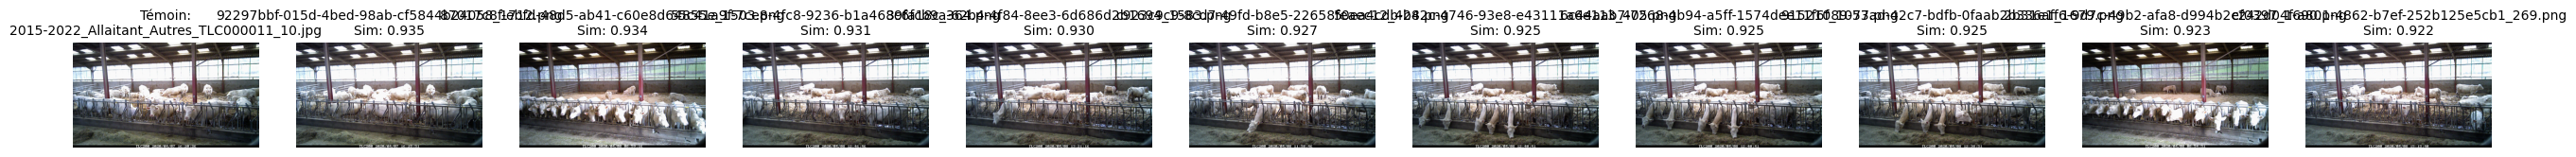

Bandeau sauvegardé dans : visualisation/2015-2022_Allaitant_Autres_TLC000011_10.jpg.png


In [112]:
plot_top_similarities(
    df_collection.df_image_temoins.df_info,
    df_collection.df_train.df_info,
    index_vecteur_temoin,
    resultats,
    top_n=10
)